In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from keras import models
from keras import layers
from keras import optimizers

## Look into data

In [2]:
## Look into thte data
df = pd.read_csv('Data/train.csv')
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [3]:
## List all the columns
df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [4]:
## get data size
df.shape

(75757, 64)

In [5]:
## Look into data types
df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


# Look into the columes and corresponding data types

In [6]:
## Dived into the column and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

#### Finding: There are three columns with categorical data which will need to be converted to numerical data type. Details was discussed in below

# Look into missing data

In [7]:
## find missing data
np.sum(df.isnull())

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

In [8]:
## Find the columns which has missing values and calculate their missing propertional
df.columns[np.sum(df.isnull())!=0]

Index(['year_built', 'energy_star_rating', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'],
      dtype='object')

In [9]:
## Identify the data type for those missing columns
df_missing=df[['year_built', 'energy_star_rating', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']]
df_missing.head()

,year_built,energy_star_rating,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
0,1942.0,11.0,1.0,1.0,1.0,NaN
1,1955.0,45.0,1.0,NaN,1.0,12.0
2,1951.0,97.0,1.0,NaN,1.0,12.0
3,1980.0,46.0,1.0,NaN,1.0,12.0
4,1985.0,100.0,1.0,1.0,1.0,NaN


In [10]:
## get percentage of null in each column
np.sum(df_missing.isnull())/df.shape[0]

year_built                   0.024249
energy_star_rating           0.352561
direction_max_wind_speed     0.542287
direction_peak_wind_speed    0.551909
max_wind_speed               0.542287
days_with_fog                0.604512
dtype: float64

#### Summary: There are six features with missing values and all of them are numerical data type. The details of handing missing data are discussed in Jupyter Notebook: missing data handling and year built.ipynb

## Question 1: Does any particular types of buildings have potentially higher energy consumption? (Eq. commercial v.s. residential and facility types)?
#### Note: Both building_class and facility_type columns are categorical data and no missing value

In [11]:
## get building class 
df['building_class'].value_counts()

Residential    43558
Commercial     32199
Name: building_class, dtype: int64

In [12]:
## Look-1: according to the building_class, which kind of building has higher energy comsumption?
df.groupby('building_class').mean()['site_eui']

building_class
Commercial     85.755239
Residential    80.240957
Name: site_eui, dtype: float64

In [13]:
print ("difference= ", 85.755239/80.240957)

difference=  1.068721538303687


##### Q1 Finding-1: The numbers of data for Residential and Commercial are near even, but the average site_eui of Commercial is about 7% higher than that of residential buildings

In [14]:
df.groupby('building_class')['site_eui'].value_counts()

building_class  site_eui  
Commercial      61.531421     15
                62.030055     15
                52.157104     14
                59.437158     14
                61.631148     14
                              ..
Residential     857.546216     1
                870.163161     1
                903.667575     1
                916.909240     1
                993.428259     1
Name: site_eui, Length: 62780, dtype: int64

### Break into Residential buildings

In [15]:
## In residential building, is there any type of building higher eui?
df_residential = df.loc[df['building_class'] == 'Residential']
df_res_group = df_residential.groupby('facility_type').mean()['site_eui'].sort_index()
print (df_res_group)

facility_type
2to4_Unit_Building                      31.876915
5plus_Unit_Building                     36.737785
Mixed_Use_Commercial_and_Residential    89.529798
Mixed_Use_Predominantly_Commercial      69.133400
Mixed_Use_Predominantly_Residential     81.797872
Multifamily_Uncategorized               83.878522
Name: site_eui, dtype: float64


In [16]:
## Count the data for each facility type
df_res_count = df_residential['facility_type'].value_counts().sort_index()
print (df_res_count)

2to4_Unit_Building                       1893
5plus_Unit_Building                      1273
Mixed_Use_Commercial_and_Residential      672
Mixed_Use_Predominantly_Commercial        256
Mixed_Use_Predominantly_Residential         9
Multifamily_Uncategorized               39455
Name: facility_type, dtype: int64


In [17]:
## combine the site_eui Mean and the corresponding number of building of that facility_type
frame = { 'site_eui Mean': df_res_group, 'facility_type count': df_res_count}  
df_buildtype_ana = pd.DataFrame(frame)
#print (df_buildtype_ana)
df_buildtype_ana_sort = df_buildtype_ana.sort_values('site_eui Mean')
print (df_buildtype_ana)

                                      site_eui Mean  facility_type count
2to4_Unit_Building                        31.876915                 1893
5plus_Unit_Building                       36.737785                 1273
Mixed_Use_Commercial_and_Residential      89.529798                  672
Mixed_Use_Predominantly_Commercial        69.133400                  256
Mixed_Use_Predominantly_Residential       81.797872                    9
Multifamily_Uncategorized                 83.878522                39455


Text(0, 0.5, 'Site_eui')

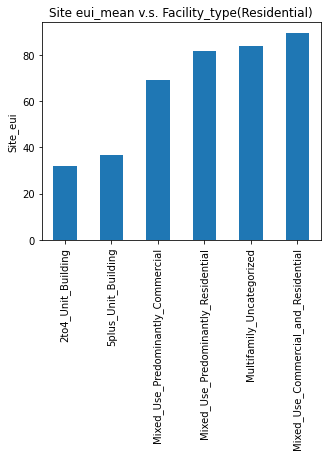

In [18]:
## Plot the Mean of site_eui for each facility_type(Residential building)
facility_res = df_buildtype_ana_sort['site_eui Mean'].plot(kind='bar', figsize=(5,4), title = 'Site eui_mean v.s. Facility_type(Residential)')
facility_res.set_ylabel("Site_eui")

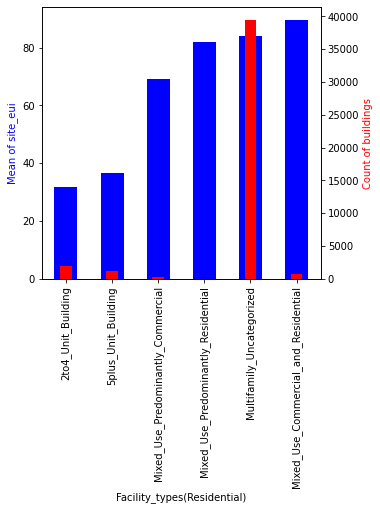

<Figure size 432x288 with 0 Axes>

In [23]:
x = df_buildtype_ana_sort.index
y1 = df_buildtype_ana_sort['site_eui Mean']
y2 = df_buildtype_ana_sort['facility_type count']

fig, ax1 = plt.subplots()
fig.set_size_inches(5, 5)

ax2 = ax1.twinx()
ax1.bar(x, y1, color = 'b', width = 0.5)
ax2.bar(x, y2, color = 'r', width = 0.25)

ax1.set_xlabel('Facility_types(Residential)')
ax1.set_ylabel('Mean of site_eui', color='b')
ax2.set_ylabel('Count of buildings', color='r')

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.show()

plt.savefig('Images/ResFacility_eui.png')

### Break into commercial buildings

In [24]:
## In commercial building, is there any type of building higher eui?
df_commercial = df.loc[df['building_class'] == 'Commercial']
df_com_group = df_commercial.groupby('facility_type').mean()['site_eui'].sort_index()
print (df_com_group)

facility_type
Commercial_Other                              92.642037
Commercial_Unknown                           113.151628
Data_Center                                  339.734876
Education_College_or_university              108.629116
Education_Other_classroom                     69.441531
Education_Preschool_or_daycare                60.974215
Education_Uncategorized                       46.172799
Food_Sales                                   136.793222
Food_Service_Other                            29.236616
Food_Service_Restaurant_or_cafeteria         195.593925
Food_Service_Uncategorized                   128.801496
Grocery_store_or_food_market                 241.135162
Health_Care_Inpatient                        248.340597
Health_Care_Outpatient_Clinic                103.613131
Health_Care_Outpatient_Uncategorized         189.892345
Health_Care_Uncategorized                    183.945201
Industrial                                   125.345295
Laboratory                        

In [25]:
## Count the data for each facility type
df_com_count = df_commercial['facility_type'].value_counts().sort_index()
print (df_com_count)

Commercial_Other                              1744
Commercial_Unknown                              95
Data_Center                                     27
Education_College_or_university               1056
Education_Other_classroom                     3860
Education_Preschool_or_daycare                 108
Education_Uncategorized                        709
Food_Sales                                      70
Food_Service_Other                              17
Food_Service_Restaurant_or_cafeteria            64
Food_Service_Uncategorized                      18
Grocery_store_or_food_market                   448
Health_Care_Inpatient                          409
Health_Care_Outpatient_Clinic                   56
Health_Care_Outpatient_Uncategorized            36
Health_Care_Uncategorized                       51
Industrial                                     384
Laboratory                                     107
Lodging_Dormitory_or_fraternity_sorority       669
Lodging_Hotel                  

In [26]:
## combine the site_eui Mean and the corresponding number of building of that facility_type
frame = { 'site_eui Mean': df_com_group, 'facility_type count': df_com_count}  
df_buildtype_com = pd.DataFrame(frame)
#print (df_buildtype_com)
df_buildtype_com_sort = df_buildtype_com.sort_values('site_eui Mean')
print (df_buildtype_com_sort)

                                           site_eui Mean  facility_type count
Warehouse_Selfstorage                          21.589284                  577
Food_Service_Other                             29.236616                   17
Warehouse_Uncategorized                        35.936435                  330
Warehouse_Nonrefrigerated                      38.209399                 1255
Warehouse_Distribution_or_Shipping_center      39.559542                  604
Service_Drycleaning_or_Laundry                 42.112542                    9
Religious_worship                              44.560675                  399
Education_Uncategorized                        46.172799                  709
Retail_Vehicle_dealership_showroom             46.640952                   74
Education_Preschool_or_daycare                 60.974215                  108
Public_Assembly_Uncategorized                  62.872612                   25
Lodging_Uncategorized                          66.595438        

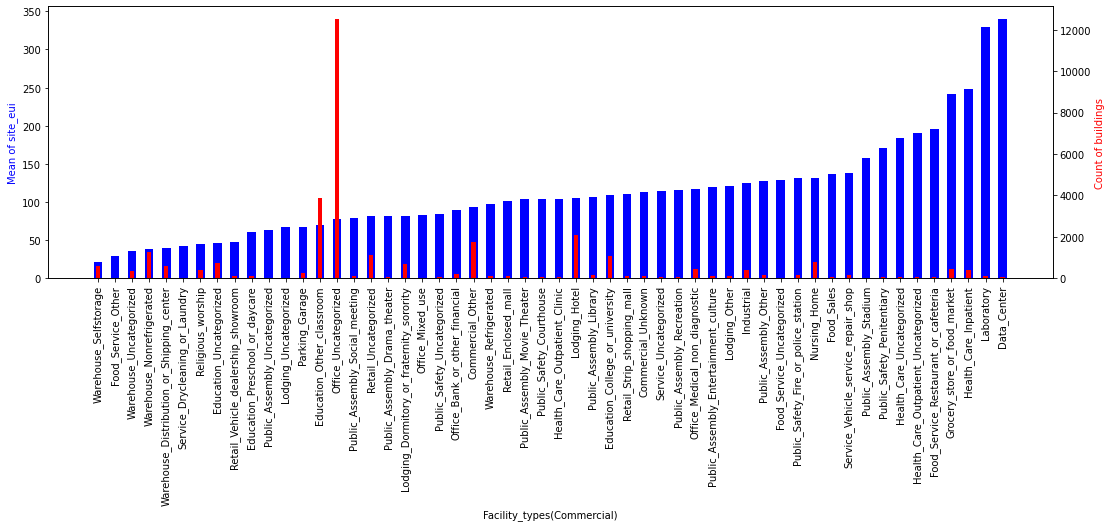

<Figure size 432x288 with 0 Axes>

In [27]:
## plot the site_eui and count of building per facility type of commercial buildings
x = df_buildtype_com_sort.index
y1 = df_buildtype_com_sort['site_eui Mean']
y2 = df_buildtype_com_sort['facility_type count']

fig, ax1 = plt.subplots()
fig.set_size_inches(18, 5)

ax2 = ax1.twinx()
ax1.bar(x, y1, color = 'b', width = 0.5)
ax2.bar(x, y2, color = 'r', width = 0.25)

ax1.set_xlabel('Facility_types(Commercial)')
ax1.set_ylabel('Mean of site_eui', color='b')
ax2.set_ylabel('Count of buildings', color='r')

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.show()
plt.savefig('Images/ComFacility_eui.png')

##### Q1_Finding_1: The average site_eui of commercial buildings is about 7% slightly higher than that of residential buildings. However, if look into the facilities_type of them, there is q quite significant different phenomenon.
##### Q1_Finding_2: Residential buildings do not have significant site_eui based on different facility types and only the mixed used with the commercial ones consume slightly more energy
##### Q1_Finding_3: Commercial buildings have significant different site_eui based on different facility types. Eq, data center, labortory, health_cares and grocery stores have significant high site_eui but the warehouse, religion facilities can be expected to have very low site_eui 

## Handle Categorical data 1) building_class, 2) state_factor, 3) facility_type 
#### Step1: Combine train.csv and test.csv file together to comvert categorical data consistently
#### Step2: Encode categorical columns using 1) onehot encoder, 2) label encoder, 3) ordinal encoder 

In [28]:
## Check data_train and data_test
df_train = pd.read_csv('Data/train.csv')
print (df_train.shape)
df_test = pd.read_csv('Data/test.csv')
print (df_test.shape)

(75757, 64)
(9705, 63)


In [29]:
# Step1: Combine df_train and df_test to handle categorical data
## Note: 0-75756(train), 75757-85461(test)
df_all = df_train.append(df_test, ignore_index=True)
print (df_all.shape)

(85462, 64)


/var/folders/rx/gncdv4lj3w51g3gtm2z1qfg40000gn/T/ipykernel_88163/1711801550.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_train.append(df_test, ignore_index=True)


In [30]:
## Combine train and test data to df_all and save to df_all.csv
df_all.to_csv('Data/df_all.csv', index=False)
df_all_test = pd.read_csv('Data/df_all.csv')
df_all_test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [32]:
## Define map_list_for ordinal encoder
map_list_test = {'Warehouse_Selfstorage': 0, 
                            'Food_Service_Other': 1,
                            '2to4_Unit_Building': 2, 
                            'Warehouse_Uncategorized': 3, 
                        '5plus_Unit_Building': 4,
                        'Warehouse_Nonrefrigerated': 5,
                        'Warehouse_Distribution_or_Shipping_center': 6,
                        'Service_Drycleaning_or_Laundry': 7,
                        'Religious_worship': 8,
                        'Education_Uncategorized': 9,
                        'Retail_Vehicle_dealership_showroom': 10,
                        'Education_Preschool_or_daycare': 11,
                        'Public_Assembly_Uncategorized': 12,
                        'Lodging_Uncategorized': 13,
                        'Parking_Garage': 14,
                        'Mixed_Use_Predominantly_Commercial': 15,
                        'Education_Other_classroom': 16,
                        'Office_Uncategorized': 17,
                        'Public_Assembly_Social_meeting': 18,
                        'Retail_Uncategorized': 19,
                        'Public_Assembly_Drama_theater': 20,
                        'Lodging_Dormitory_or_fraternity_sorority': 21,
                        'Mixed_Use_Predominantly_Residential': 22,
                        'Office_Mixed_use': 23,
                        'Public_Safety_Uncategorized': 24,
                        'Multifamily_Uncategorized': 25,
                        'Mixed_Use_Commercial_and_Residential': 26,
                        'Office_Bank_or_other_financial': 27,
                        'Commercial_Other': 28,
                        'Warehouse_Refrigerated': 29,
                        'Retail_Enclosed_mall': 30,
                        'Public_Assembly_Movie_Theater': 31,
                        'Public_Safety_Courthouse': 32,
                        'Health_Care_Outpatient_Clinic': 33,
                        'Lodging_Hotel': 34,
                        'Public_Assembly_Library': 35,
                        'Education_College_or_university': 36,
                        'Retail_Strip_shopping_mall': 37,
                        'Commercial_Unknown': 38,
                        'Service_Uncategorized': 39,
                        'Public_Assembly_Recreation': 40,
                        'Office_Medical_non_diagnostic': 41,
                        'Public_Assembly_Entertainment_culture': 42,
                        'Lodging_Other': 43,
                        'Industrial': 44,
                        'Public_Assembly_Other': 45,
                        'Food_Service_Uncategorized': 46,
                        'Public_Safety_Fire_or_police_station': 47,
                        'Nursing_Home': 48,
                        'Food_Sales': 49,
                        'Service_Vehicle_service_repair_shop': 50,
                        'Public_Assembly_Stadium': 51,
                        'Public_Safety_Penitentiary': 52,
                        'Health_Care_Uncategorized': 53,
                        'Health_Care_Outpatient_Uncategorized': 54,
                        'Food_Service_Restaurant_or_cafeteria': 55,
                        'Grocery_store_or_food_market': 56,
                        'Health_Care_Inpatient': 57,
                        'Laboratory': 58,
                        'Data_Center': 59
                           }

In [33]:
## Step2: encode categorical columns
import ManipulateCategory as mc
## encode 'State_Factor'
state_label = mc.labelencoder_conversion(df_all, 'State_Factor', 'state_label')
state_onehot = mc.onehotencoder_conversion(df_all, 'State_Factor')

## Encode 'building_class'
class_onehot = mc.onehotencoder_conversion(df_all, 'building_class')

## Encode 'facility_type'
facility_label = mc.labelencoder_conversion(df_all, 'facility_type', 'facility_label')
facility_onehot = mc.onehotencoder_conversion(df_all, 'facility_type')
facility_ordinal = mc.ordinalencoder_conversion(df_all, 'facility_type', map_list_test)

### Method-1
##### 1) 'State_Factor' , label encoder
##### 2) 'building_class' one-hot encoder
##### 3) 'facility_type' label encoder

In [34]:
## drop preprocessing categorical data 
facility_label_join = facility_label.drop(['facility_type'], axis=1)
state_label_join = state_label.drop(['State_Factor'], axis=1)
class_onehot_join = class_onehot.drop(['building_class'], axis=1)

#class_onehot_join.columns = ['Commercial', 'Residential']

## join preprocessing categorical data into df
df_all_joinM1 = df_all.join(facility_label_join).join(state_label_join).join(class_onehot_join)

## dropped preproceed categorical columns -- State_Factor, building_class, facility_type
df_all_joinM1_dropcol=df_all_joinM1.drop(['building_class', 'State_Factor', 'facility_type'], axis=1)
print (df_all_joinM1_dropcol.shape)

(85462, 65)


In [35]:
## Save df_all_joinM1_dropcol to df_all_labelencode.csv
df_all_joinM1_dropcol.to_csv('Data/df_all_labelencode.csv', index=False)
df_all_test = pd.read_csv('Data/df_all_labelencode.csv')
df_all_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85462 entries, 0 to 85461
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year_Factor                 85462 non-null  int64  
 1   floor_area                  85462 non-null  float64
 2   year_built                  83533 non-null  float64
 3   energy_star_rating          56499 non-null  float64
 4   ELEVATION                   85462 non-null  float64
 5   january_min_temp            85462 non-null  int64  
 6   january_avg_temp            85462 non-null  float64
 7   january_max_temp            85462 non-null  int64  
 8   february_min_temp           85462 non-null  int64  
 9   february_avg_temp           85462 non-null  float64
 10  february_max_temp           85462 non-null  int64  
 11  march_min_temp              85462 non-null  int64  
 12  march_avg_temp              85462 non-null  float64
 13  march_max_temp              854

### Method-2
##### 1) 'State_Factor' , one-hot encoder
##### 2) 'building_class' one-hot encoder
##### 3) 'facility_type' one-hot encoder

In [36]:
## drop preprocessing categorical data 
facility_onehot_join = facility_onehot.drop(['facility_type'], axis=1)
state_onehot_join = state_onehot.drop(['State_Factor'], axis=1)
class_onehot_join = class_onehot.drop(['building_class'], axis=1)

#class_onehot_join.columns = ['Commercial', 'Residential']

## join preprocessing categorical data into df
df_all_joinM2 = df_all.join(facility_onehot_join).join(state_onehot_join).join(class_onehot_join)

## dropped preproceed categorical columns -- State_Factor, building_class, facility_type
df_all_joinM2_dropcol=df_all_joinM2.drop(['building_class', 'State_Factor', 'facility_type'], axis=1)
print (df_all_joinM2_dropcol.shape)
df_all_joinM2_dropcol.head()

(85462, 130)


,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,facility_type_Warehouse_Uncategorized,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_6,State_Factor_State_8,building_class_Commercial,building_class_Residential
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
## Save df_all_joinM2_dropcol to df_all_onehotencode.csv
df_all_joinM2_dropcol.to_csv('Data/df_all_onehotencode.csv', index=False)
df_all_test = pd.read_csv('Data/df_all_onehotencode.csv')
df_all_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85462 entries, 0 to 85461
Columns: 130 entries, Year_Factor to building_class_Residential
dtypes: float64(93), int64(37)
memory usage: 84.8 MB


### Method-3
##### 1) 'State_Factor' , one-hot encoder
##### 2) 'building_class' one-hot encoder
##### 3) 'facility_type' ordinal encoder

In [38]:
facility_ordinal.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,56,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,6,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,30,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,16,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,5,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [39]:
## drop preprocessing categorical data 
facility_ordinal_join = facility_ordinal['facility_type']
state_onehot_join = state_onehot.drop(['State_Factor'], axis=1)
class_onehot_join = class_onehot.drop(['building_class'], axis=1)

## dropped preproceed categorical columns -- State_Factor, building_class, facility_type
df_all_dropcol=df_all.drop(['building_class', 'State_Factor', 'facility_type'], axis=1)

## join preprocessing categorical data into df
df_all_joinM3_dropcol = df_all_dropcol.join(facility_ordinal_join).join(state_onehot_join).join(class_onehot_join)

print (df_all.shape)
print (df_all_dropcol.shape)
print (facility_ordinal_join.shape)
print (state_onehot_join.shape)
print (class_onehot_join.shape)
print (df_all_joinM3_dropcol.shape)
df_all_joinM3_dropcol.head()

(85462, 64)
(85462, 61)
(85462,)
(85462, 7)
(85462, 2)
(85462, 71)


,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,facility_type,State_Factor_State_1,State_Factor_State_10,State_Factor_State_11,State_Factor_State_2,State_Factor_State_4,State_Factor_State_6,State_Factor_State_8,building_class_Commercial,building_class_Residential
0,1,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,...,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,...,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,...,30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,...,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,...,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
## Save df_all_joinM3_dropcol to df_all_ordinalencode.csv
df_all_joinM3_dropcol.to_csv('Data/df_all_ordinalencode.csv', index=False)

## find correlation between features

In [14]:
df_eui = df['site_eui']
df_eui.head()

0    248.682615
1     26.500150
2     24.693619
3     48.406926
4      3.899395
Name: site_eui, dtype: float64

In [17]:
## find correlation between attributes w/o missing values
corr_df_nomiss = df_nomiss.corr()
corr_df_nomiss

,Year_Factor,floor_area,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,...,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
Year_Factor,1.000000,-0.036363,0.132855,0.007913,-0.099628,-0.291137,-0.391312,-0.101799,-0.093735,-0.054079,...,0.137436,0.260270,0.263467,0.209500,0.185233,0.054718,-0.043701,-0.013635,-0.045179,0.534754
floor_area,-0.036363,1.000000,0.097797,-0.148467,-0.137654,-0.104118,-0.106110,-0.120068,-0.042102,-0.121068,...,0.136123,0.135476,0.138712,0.140324,0.049897,0.022583,-0.031415,-0.009205,0.073967,-0.090856
ELEVATION,0.132855,0.097797,1.000000,-0.255502,-0.233452,-0.345130,-0.153185,-0.184543,0.027383,-0.285815,...,0.309669,0.395252,0.561204,0.618740,0.062014,0.184423,0.104934,0.077188,0.011798,-0.201664
january_min_temp,0.007913,-0.148467,-0.255502,1.000000,0.971149,0.658252,0.812591,0.857222,0.528175,0.863239,...,-0.863560,-0.775875,-0.646992,-0.449830,-0.497106,-0.038401,0.200292,0.034708,-0.179190,0.052380
january_avg_temp,-0.099628,-0.137654,-0.233452,0.971149,1.000000,0.754602,0.830236,0.911228,0.607073,0.907587,...,-0.890095,-0.837574,-0.687320,-0.417367,-0.462088,0.049163,0.256483,0.048114,-0.167982,-0.051719
january_max_temp,-0.291137,-0.104118,-0.345130,0.658252,0.754602,1.000000,0.627150,0.718547,0.488743,0.724338,...,-0.599183,-0.689919,-0.717549,-0.547716,-0.114064,0.217033,0.323637,0.057500,-0.097070,-0.137646
february_min_temp,-0.391312,-0.106110,-0.153185,0.812591,0.830236,0.627150,1.000000,0.803705,0.567567,0.708627,...,-0.715126,-0.707608,-0.574771,-0.403062,-0.627310,-0.076186,0.205320,0.029134,-0.147348,-0.231379
february_avg_temp,-0.101799,-0.120068,-0.184543,0.857222,0.911228,0.718547,0.803705,1.000000,0.822362,0.900891,...,-0.854728,-0.886845,-0.718280,-0.393891,-0.470964,0.116649,0.249123,0.041692,-0.154071,-0.057739
february_max_temp,-0.093735,-0.042102,0.027383,0.528175,0.607073,0.488743,0.567567,0.822362,1.000000,0.655828,...,-0.512941,-0.646921,-0.460354,-0.201020,-0.222516,0.365061,0.241913,0.048539,-0.106693,-0.315470
march_min_temp,-0.054079,-0.121068,-0.285815,0.863239,0.907587,0.724338,0.708627,0.900891,0.655828,1.000000,...,-0.835703,-0.886246,-0.806905,-0.441159,-0.408457,0.114681,0.195614,0.030446,-0.134110,-0.005615


<AxesSubplot:>

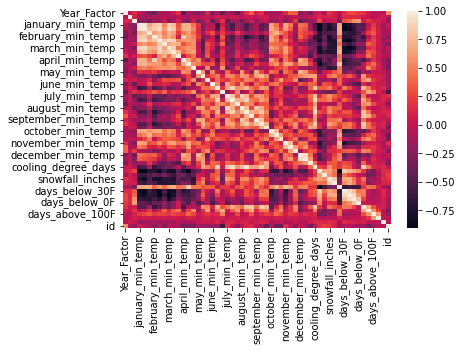

In [18]:
# get heatmap for the correlation between attributes w/o missing values
sns.heatmap(corr_df_nomiss)

In [19]:
## Question: Find Top 10 correlation attributes
## sort the correlation between attributes w/o missing and 'site_eui'
corr_df_nomiss['site_eui'].sort_values()

january_min_temp       -0.179190
january_avg_temp       -0.167982
february_avg_temp      -0.154071
february_min_temp      -0.147348
march_avg_temp         -0.135303
march_min_temp         -0.134110
april_avg_temp         -0.113008
april_min_temp         -0.111528
february_max_temp      -0.106693
november_min_temp      -0.100349
january_max_temp       -0.097070
october_min_temp       -0.095334
avg_temp               -0.089201
april_max_temp         -0.078969
november_avg_temp      -0.069882
march_max_temp         -0.064302
december_min_temp      -0.058888
december_avg_temp      -0.050328
days_above_100F        -0.050029
Year_Factor            -0.045179
october_avg_temp       -0.040162
june_max_temp          -0.029233
id                     -0.026500
days_above_110F        -0.014190
days_above_90F         -0.007980
may_min_temp           -0.002043
ELEVATION               0.011798
november_max_temp       0.012002
october_max_temp        0.021272
august_max_temp         0.028359
may_max_te

,year_built,energy_star_rating,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
year_built,1.000000,-0.073857,0.001168,-0.009591,0.004945,0.084167,0.017162
energy_star_rating,-0.073857,1.000000,-0.000992,0.002014,-0.000333,0.019387,-0.511012
direction_max_wind_speed,0.001168,-0.000992,1.000000,0.999784,0.988797,0.330441,0.010217
direction_peak_wind_speed,-0.009591,0.002014,0.999784,1.000000,0.992227,0.330064,0.013589
max_wind_speed,0.004945,-0.000333,0.988797,0.992227,1.000000,0.353990,0.010639
days_with_fog,0.084167,0.019387,0.330441,0.330064,0.353990,1.000000,-0.055388
site_eui,0.017162,-0.511012,0.010217,0.013589,0.010639,-0.055388,1.000000


<AxesSubplot:>

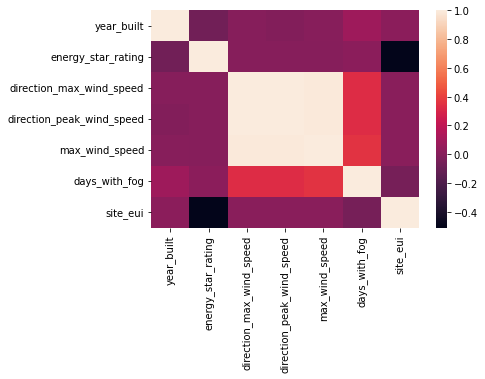

In [22]:
## sort the correlation between attributes w/ missing and 'site_eui'
corr_df_miss_eui['site_eui'].sort_values()

energy_star_rating          -0.511012
days_with_fog               -0.055388
direction_max_wind_speed     0.010217
max_wind_speed               0.010639
direction_peak_wind_speed    0.013589
year_built                   0.017162
site_eui                     1.000000
Name: site_eui, dtype: float64

In [23]:
df['energy_star_rating'].value_counts()

100.0    1946
1.0       985
79.0      782
84.0      781
89.0      781
         ... 
21.0      252
16.0      248
11.0      247
10.0      237
0.0         1
Name: energy_star_rating, Length: 101, dtype: int64

In [101]:
X_nomiss['facility_type'].value_counts()

Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              